In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

In [2]:
plt.style.use("ggplot")

In [3]:
def sample_name(s: str) -> str:
    for sfx in ["_rep1", "_rep2", "-singleplex", "-multiplex"]:
        s = s.replace(sfx, "")
    return s

def load_susceptibility(stream) -> dict:
    """Extract the susceptibility info from the JSON"""
    data = json.load(stream)
    try:
        return data[next(iter(data.keys()))]["susceptibility"]
    except (KeyError, TypeError):
        return data["susceptibility"]

In [4]:
with open("../../docs/final_samples.csv") as fp:
    final_samples = set(fp.read().splitlines()) 
len(final_samples)

72

# Figure 3

In [6]:
fig3_df = pd.read_csv("fig3.csv").query("name in @final_samples")

In [7]:
fig3_df

,name,lineage,source,technology,smear,is_multiplex,species,correct_lineage,correct_species,coverage,concentration,site,l,id,xpert
0,Test_15,4.10,culture,illumina,++,False,Mycobacterium_tuberculosis,True,True,100.000000,226.000000,mum,7.0,15_mum,r
1,Test_15,2.2,sputum,illumina,++,False,Mycobacterium_tuberculosis,False,True,3.100000,226.000000,mum,7.0,15_mum,r
2,Test_15,Unknown,sputum,nanopore,++,True,Mycobacterium_tuberculosis,False,True,1.300000,226.000000,mum,7.0,15_mum,r
3,Test_15,4.10,sputum,nanopore,++,False,Mycobacterium_tuberculosis,True,True,12.100000,226.000000,mum,7.0,15_mum,r
4,Test_16,Unknown,sputum,illumina,+++,False,Mycobacterium_tuberculosis,False,True,4.800000,47.799999,mum,7.0,16_mum,r
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Test_51,2.2.3,sputum,illumina,+++,False,Mycobacterium_tuberculosis,True,True,3.900000,84.400002,mum,7.0,51_mum,s
153,Test_51,2.2.3,sputum,nanopore,+++,False,Mycobacterium_tuberculosis,True,True,48.700001,84.400002,mum,7.0,51_mum,s
154,Test_56,2.2.8,culture,illumina,+++,False,Mycobacterium_tuberculosis,True,True,100.000000,162.000000,mum,7.0,56_mum,r
155,Test_56,Unknown,sputum,illumina,+++,False,Mycobacterium_tuberculosis,False,True,2.400000,162.000000,mum,7.0,56_mum,r


In [8]:
fig3_dst = pd.read_csv("dst.csv")
fig3_dst["xpert"] = fig3_dst["xpert"].str.upper()
names = []
for s in fig3_dst["id"]:
    num, site = s.split("_")
    if site == "mad":
        names.append(f"P{num}")
    else:
        names.append(f"Test_{num}")
fig3_dst["name"] = names

In [9]:
fig3_dst = fig3_dst.query("name in @final_samples")
fig3_dst

,technology,source,is_multiplex,drug,prediction,id,conc,xpert,outcome,dna_conc,...,ref,is,nmo,nmu,correct,correct_lineage,correct_species,coverage,concentration,l
0,illumina,sputum,False,Isoniazid,S,202_mad,49.4,R,NaN,NaN,...,1,1.0,NaN,1.0,True,False,False,0.2,49.400002,4
1,illumina,sputum,False,Ethambutol,S,202_mad,49.4,R,NaN,NaN,...,1,1.0,NaN,1.0,True,False,False,0.2,49.400002,4
2,illumina,sputum,False,Streptomycin,S,202_mad,49.4,R,NaN,NaN,...,1,1.0,NaN,1.0,True,False,False,0.2,49.400002,4
3,illumina,sputum,False,Kanamycin,S,202_mad,49.4,R,NaN,NaN,...,1,1.0,NaN,1.0,True,False,False,0.2,49.400002,4
4,illumina,sputum,False,Pyrazinamide,S,202_mad,49.4,R,NaN,NaN,...,1,1.0,NaN,1.0,True,False,False,0.2,49.400002,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
859,nanopore,sputum,False,Isoniazid,R,56_mum,162.0,R,Sequenced,162.0,...,1,1.0,2.0,NaN,False,False,True,1.9,162.000000,7
860,nanopore,sputum,False,Ethambutol,S,56_mum,162.0,R,Sequenced,162.0,...,1,1.0,1.0,NaN,True,False,True,1.9,162.000000,7
861,nanopore,sputum,False,Pyrazinamide,S,56_mum,162.0,R,Sequenced,162.0,...,1,1.0,1.0,NaN,True,False,True,1.9,162.000000,7
862,nanopore,sputum,False,Rifampicin,S,56_mum,162.0,R,Sequenced,162.0,...,1,2.0,1.0,NaN,True,False,True,1.9,162.000000,7


In [10]:
def legend_without_duplicate_labels(ax, title=""):
    handles, labels = ax.get_legend_handles_labels()
    labels = list(map(str.capitalize, labels))
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique), title=title)

p-value annotation legend:
      ns: p <= 1.00e+00
$p\leq0.05$: 1.00e-02 < p <= 5.00e-02
$p\leq0.01$: 1.00e-03 < p <= 1.00e-02
$p\leq0.001$: 1.00e-04 < p <= 1.00e-03
$p\leq0.0001$: p <= 1.00e-04

+_False vs. +_True: Mann-Whitney-Wilcoxon test two-sided, P_val:4.264e-04 U_stat=9.500e+00
p-value annotation legend:
      ns: p <= 1.00e+00
$p\leq0.05$: 1.00e-02 < p <= 5.00e-02
$p\leq0.01$: 1.00e-03 < p <= 1.00e-02
$p\leq0.001$: 1.00e-04 < p <= 1.00e-03
$p\leq0.0001$: p <= 1.00e-04

++_False vs. ++_True: Mann-Whitney-Wilcoxon test two-sided, P_val:2.675e-02 U_stat=5.800e+01
p-value annotation legend:
      ns: p <= 1.00e+00
$p\leq0.05$: 1.00e-02 < p <= 5.00e-02
$p\leq0.01$: 1.00e-03 < p <= 1.00e-02
$p\leq0.001$: 1.00e-04 < p <= 1.00e-03
$p\leq0.0001$: p <= 1.00e-04

+++_False vs. +++_True: Mann-Whitney-Wilcoxon test two-sided, P_val:7.294e-06 U_stat=2.650e+01
p-value annotation legend:
      ns: p <= 1.00e+00
$p\leq0.05$: 1.00e-02 < p <= 5.00e-02
$p\leq0.01$: 1.00e-03 < p <= 1.00e-02
$p\leq

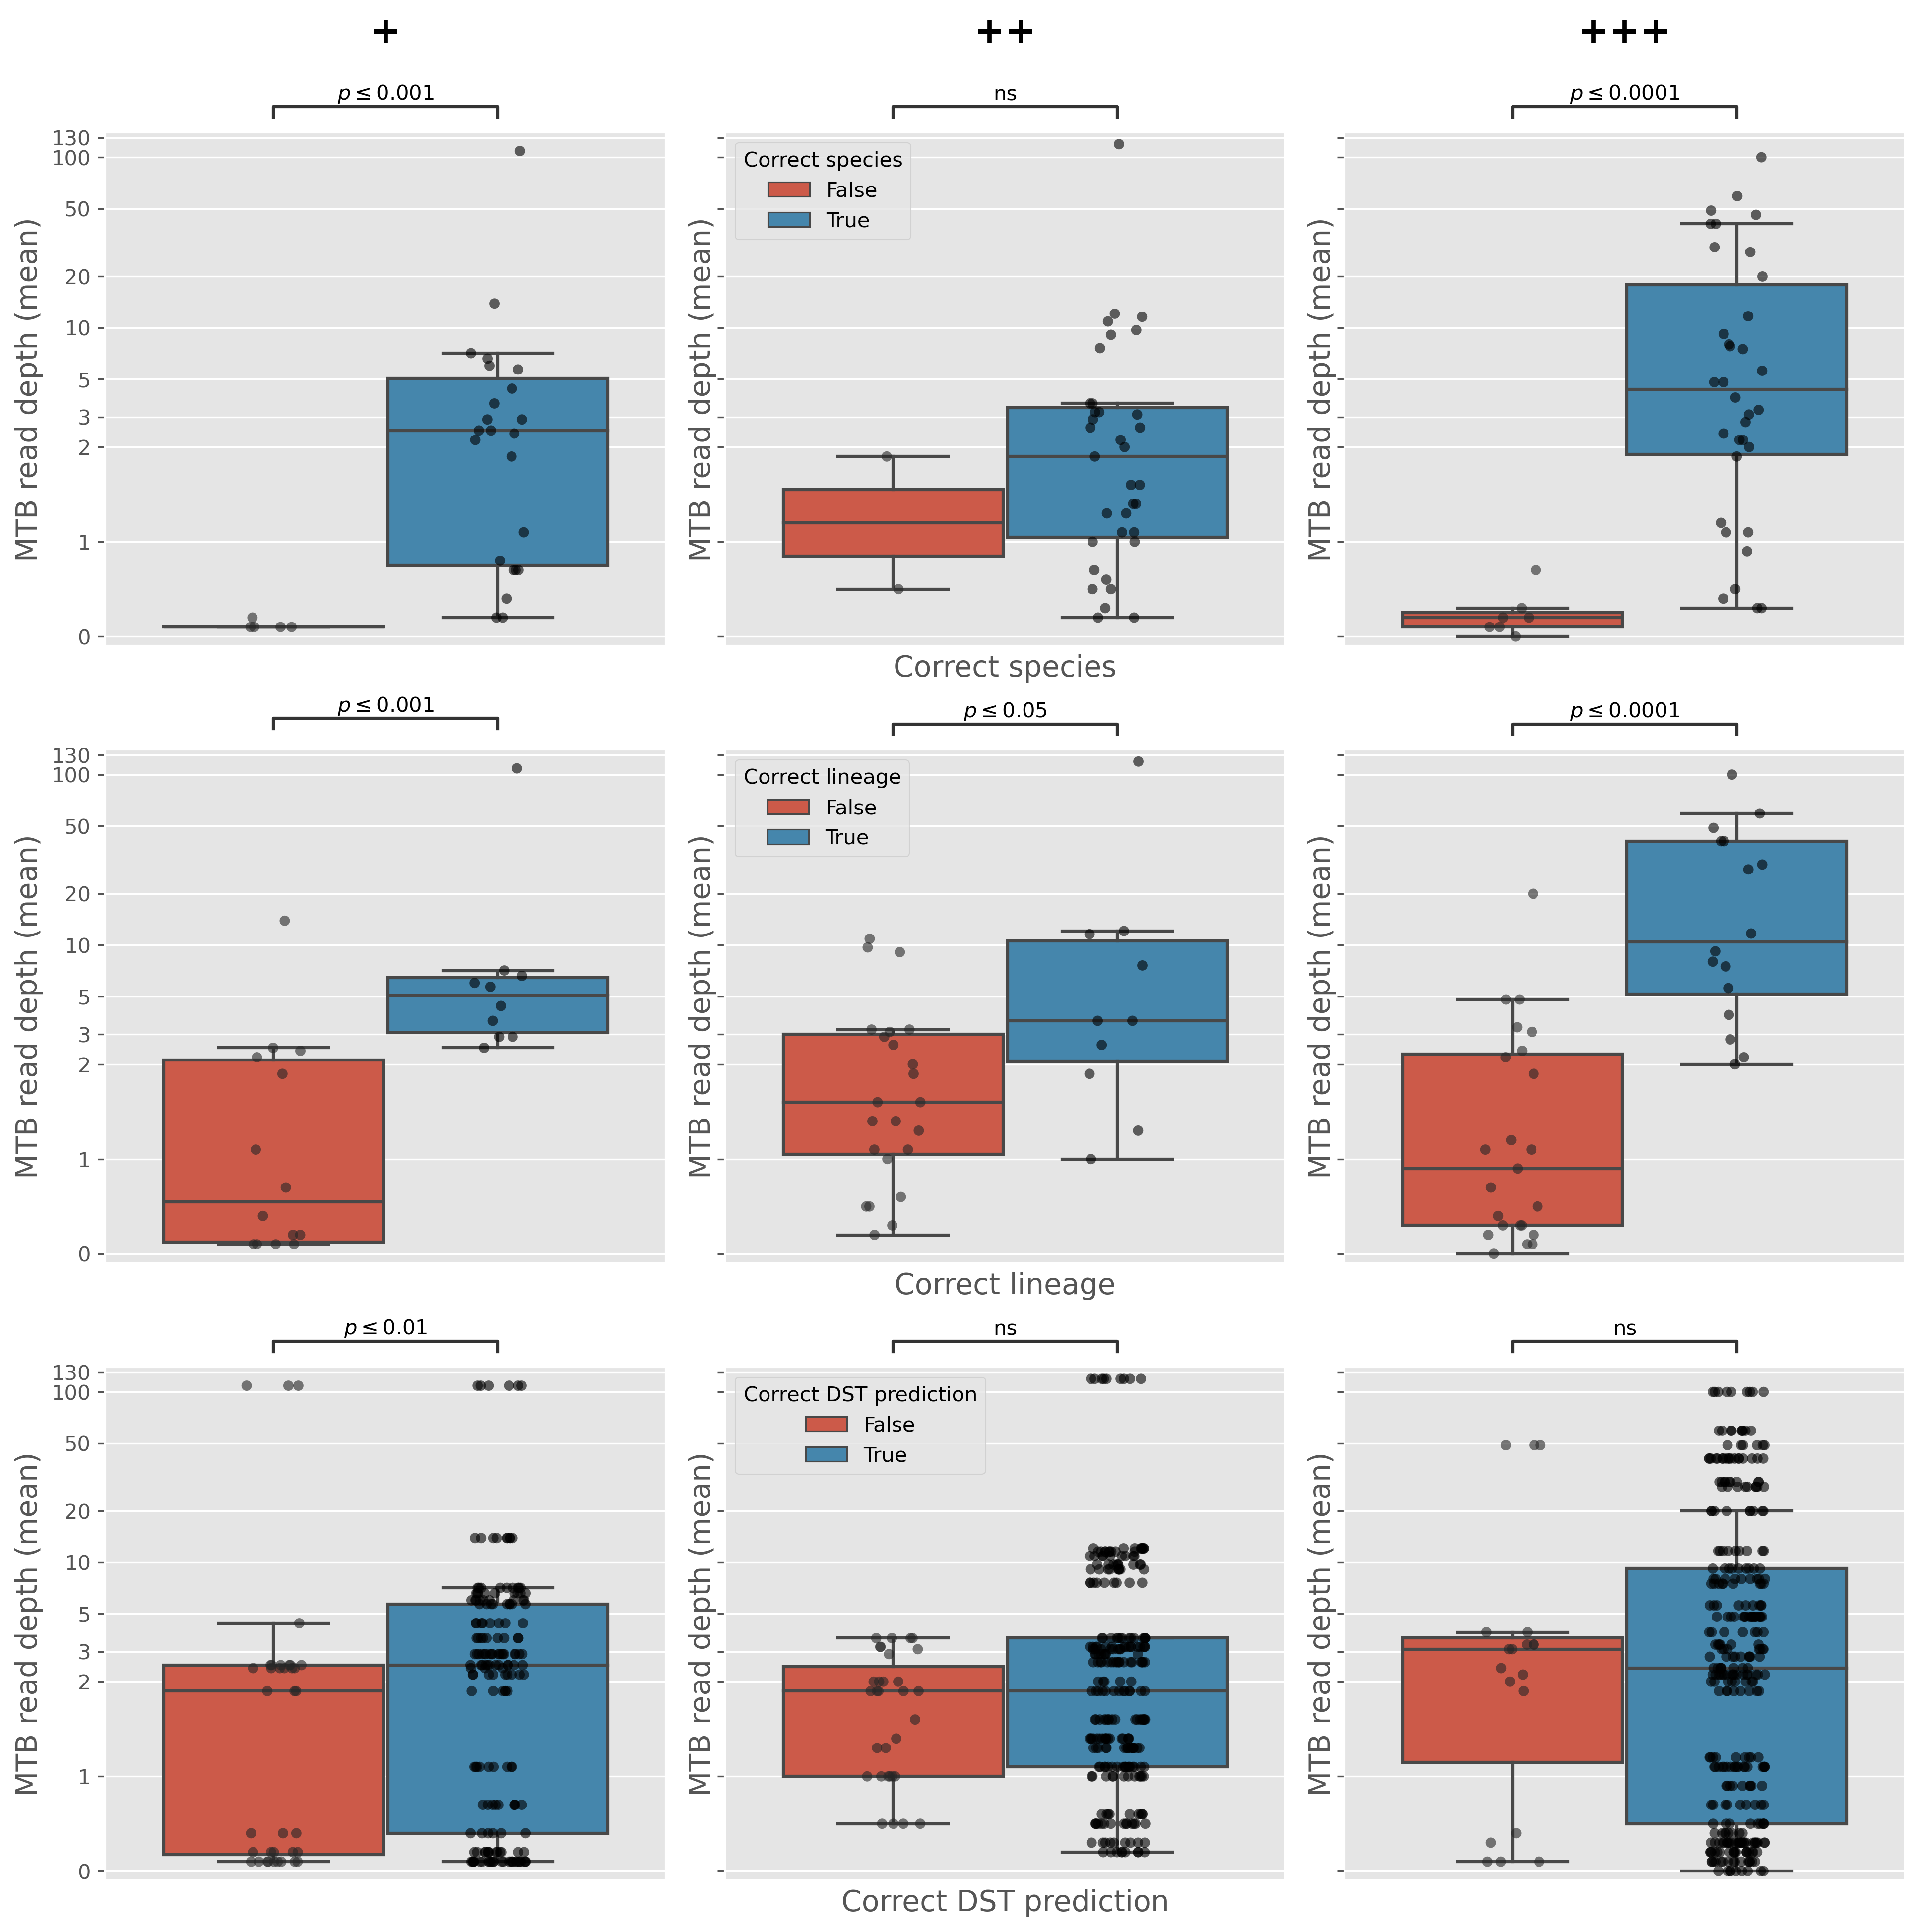

In [14]:
SMEARS = sorted(set(fig3_df["smear"]))
fig, axes = plt.subplots(nrows=3, ncols=len(SMEARS), dpi=300, figsize=(13, 13), sharey=True, sharex=False)
yticks = [0, 1, 2, 3, 5, 10, 20, 50, 100, 130]
pval_fmt = {"pvalue_thresholds":[[1e-4, "$p\leq0.0001$"], [1e-3, "$p\leq0.001$"], [1e-2, "$p\leq0.01$"], [0.05, "$p\leq0.05$"], [1, "ns"]]}


# lineage
lineage_axes = axes[1]
y="coverage"
x="smear"
hue="correct_lineage"
xlab = "Correct lineage"
alpha = 0.6
fs = 14
hue_order = [False, True]
for i, s in enumerate(SMEARS):
    ax = lineage_axes[i]
    ax.set_yscale("symlog")
    data = fig3_df.query("source == 'sputum' and smear==@s")
    sns.boxplot(data=data, x=x, y=y, hue=hue, fliersize=0, hue_order=hue_order, ax=ax)

    annot = Annotator(ax, [[(s, False), (s, True)]], data=data, x=x, y=y, hue=hue, hue_order=hue_order)
    annot.configure(test='Mann-Whitney', loc="outside", pvalue_format=pval_fmt)
    annot.apply_test()
    annot.annotate()
    sns.stripplot(
        data=data, x=x, y=y, hue=hue, dodge=True, color="black", hue_order=hue_order, ax=ax, alpha=alpha
    )

    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)
    ax.set_ylim((-0.1, 140))
    if i == 1:
        legend_without_duplicate_labels(ax, xlab)
        ax.set_xlabel(xlab, fontsize=fs)
    else:
        ax.get_legend().remove()
        ax.set_xlabel("")
    ax.set_ylabel("MTB read depth (mean)", fontsize=fs)

    ax.set_xticks([])
    ax.set_xticklabels([])
    
# species
species_axes = axes[0]
hue="correct_species"
xlab = "Correct species"
for i, s in enumerate(SMEARS):
    ax = species_axes[i]
    data = fig3_df.query("source == 'sputum' and smear==@s")
    sns.boxplot(data=data, x=x, y=y, hue=hue, fliersize=0, hue_order=hue_order, ax=ax)
    sns.stripplot(
        data=data, x=x, y=y, hue=hue, dodge=True, color="black", hue_order=hue_order, ax=ax, alpha=alpha
    )
    
    ax.set_yscale("symlog")
    annot = Annotator(ax, [[(s, False), (s, True)]], data=data, x=x, y=y, hue=hue, hue_order=hue_order)
    annot.configure(test='Mann-Whitney', loc="outside", pvalue_format=pval_fmt)
    annot.apply_test()
    annot.annotate()
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)
    ax.set_ylim((-0.1, 140))
    if i == 1:
        legend_without_duplicate_labels(ax, xlab)
        ax.set_xlabel(xlab, fontsize=fs)
    else:
        ax.get_legend().remove()
        ax.set_xlabel("")
    ax.set_ylabel("MTB read depth (mean)", fontsize=fs)
        
    ax.set_xticks([])
    ax.set_xticklabels([])
    ax.set_title(s, y=1.15, fontdict={"fontsize": 18, "fontweight": "bold"})
    
# DST
dst_axes = axes[2]
hue="correct"
xlab = "Correct DST prediction"
for i, s in enumerate(SMEARS):
    ax = dst_axes[i]
    data = fig3_dst.query("source == 'sputum' and smear==@s")
    sns.boxplot(data=data, x=x, y=y, hue=hue, fliersize=0, hue_order=hue_order, ax=ax)
    sns.stripplot(
        data=data, x=x, y=y, hue=hue, dodge=True, color="black", hue_order=hue_order, ax=ax, alpha=alpha
    )

    ax.set_yscale("symlog")
    annot = Annotator(ax, [[(s, False), (s, True)]], data=data, x=x, y=y, hue=hue, hue_order=hue_order)
    annot.configure(test='Mann-Whitney', loc="outside", pvalue_format=pval_fmt)
    annot.apply_test()
    annot.annotate()
    ax.set_yticks(yticks)
    ax.set_yticklabels(yticks)
    ax.set_ylim((-0.1, 140))
    if i == 1:
        legend_without_duplicate_labels(ax, xlab)
    else:
        ax.get_legend().remove()
    ax.set_ylabel("MTB read depth (mean)", fontsize=fs)

    if i == 1:
        ax.set_xlabel(xlab, fontsize=fs)
    else:
        ax.set_xlabel("")
    ax.set_xticks([])
    ax.set_xticklabels([])
    
plt.tight_layout()

In [99]:
fig.savefig("fig3.png")
fig.savefig("fig3.svg")

# Figure 2a

In [110]:
fig2a_df = pd.read_csv("fig2a.csv").query("name in @final_samples and source != 'culture' and technology=='illumina'")
fig2a_df

,name,lineage,source,technology,smear,is_multiplex,species,coverage,concentration,site,id,c,cat,n
1,P201,Unknown,sputum,illumina,+,False,Mycobacterium_tuberculosis,0.800000,55.000000,mad,201_mad,0.800000,1_Illumina_1+,2
2,P202,Unknown,sputum,illumina,+,False,Unknown,0.200000,49.400002,mad,202_mad,0.200000,1_Illumina_1+,1
7,P203,4.1.2,sputum,illumina,+,False,Mycobacterium_tuberculosis,5.700000,114.000000,mad,203_mad,5.700000,1_Illumina_1+,3
10,P204,Unknown,sputum,illumina,+,False,Mycobacterium_tuberculosis,0.400000,49.000000,mad,204_mad,0.400000,1_Illumina_1+,2
14,P205,1.1.2,sputum,illumina,+,False,Mycobacterium_tuberculosis,3.600000,100.000000,mad,205_mad,3.600000,1_Illumina_1+,3
17,P206,2.2,sputum,illumina,+,False,Mycobacterium_tuberculosis,0.700000,10.000000,mad,206_mad,0.700000,1_Illumina_1+,2
18,P207,Unknown,sputum,illumina,+,False,Unknown,0.300000,65.000000,mad,207_mad,0.300000,1_Illumina_1+,1
21,P208,Unknown,sputum,illumina,+,False,Mycobacterium_tuberculosis,0.800000,33.000000,mad,208_mad,0.800000,1_Illumina_1+,2
23,P209,Unknown,sputum,illumina,+,False,Unknown,0.100000,55.000000,mad,209_mad,0.100000,1_Illumina_1+,2
26,P210,2.2.7,sputum,illumina,+,False,Mycobacterium_tuberculosis,2.900000,54.000000,mad,210_mad,2.900000,1_Illumina_1+,2


p-value annotation legend:
      ns: p <= 1.00e+00
$p\leq0.05$: 1.00e-02 < p <= 5.00e-02
$p\leq0.01$: 1.00e-03 < p <= 1.00e-02
$p\leq0.001$: 1.00e-04 < p <= 1.00e-03
$p\leq0.0001$: p <= 1.00e-04

+ vs. ++: Mann-Whitney-Wilcoxon test two-sided, P_val:1.751e-01 U_stat=9.700e+01
++ vs. +++: Mann-Whitney-Wilcoxon test two-sided, P_val:7.637e-01 U_stat=1.720e+02
+ vs. +++: Mann-Whitney-Wilcoxon test two-sided, P_val:3.028e-01 U_stat=1.060e+02


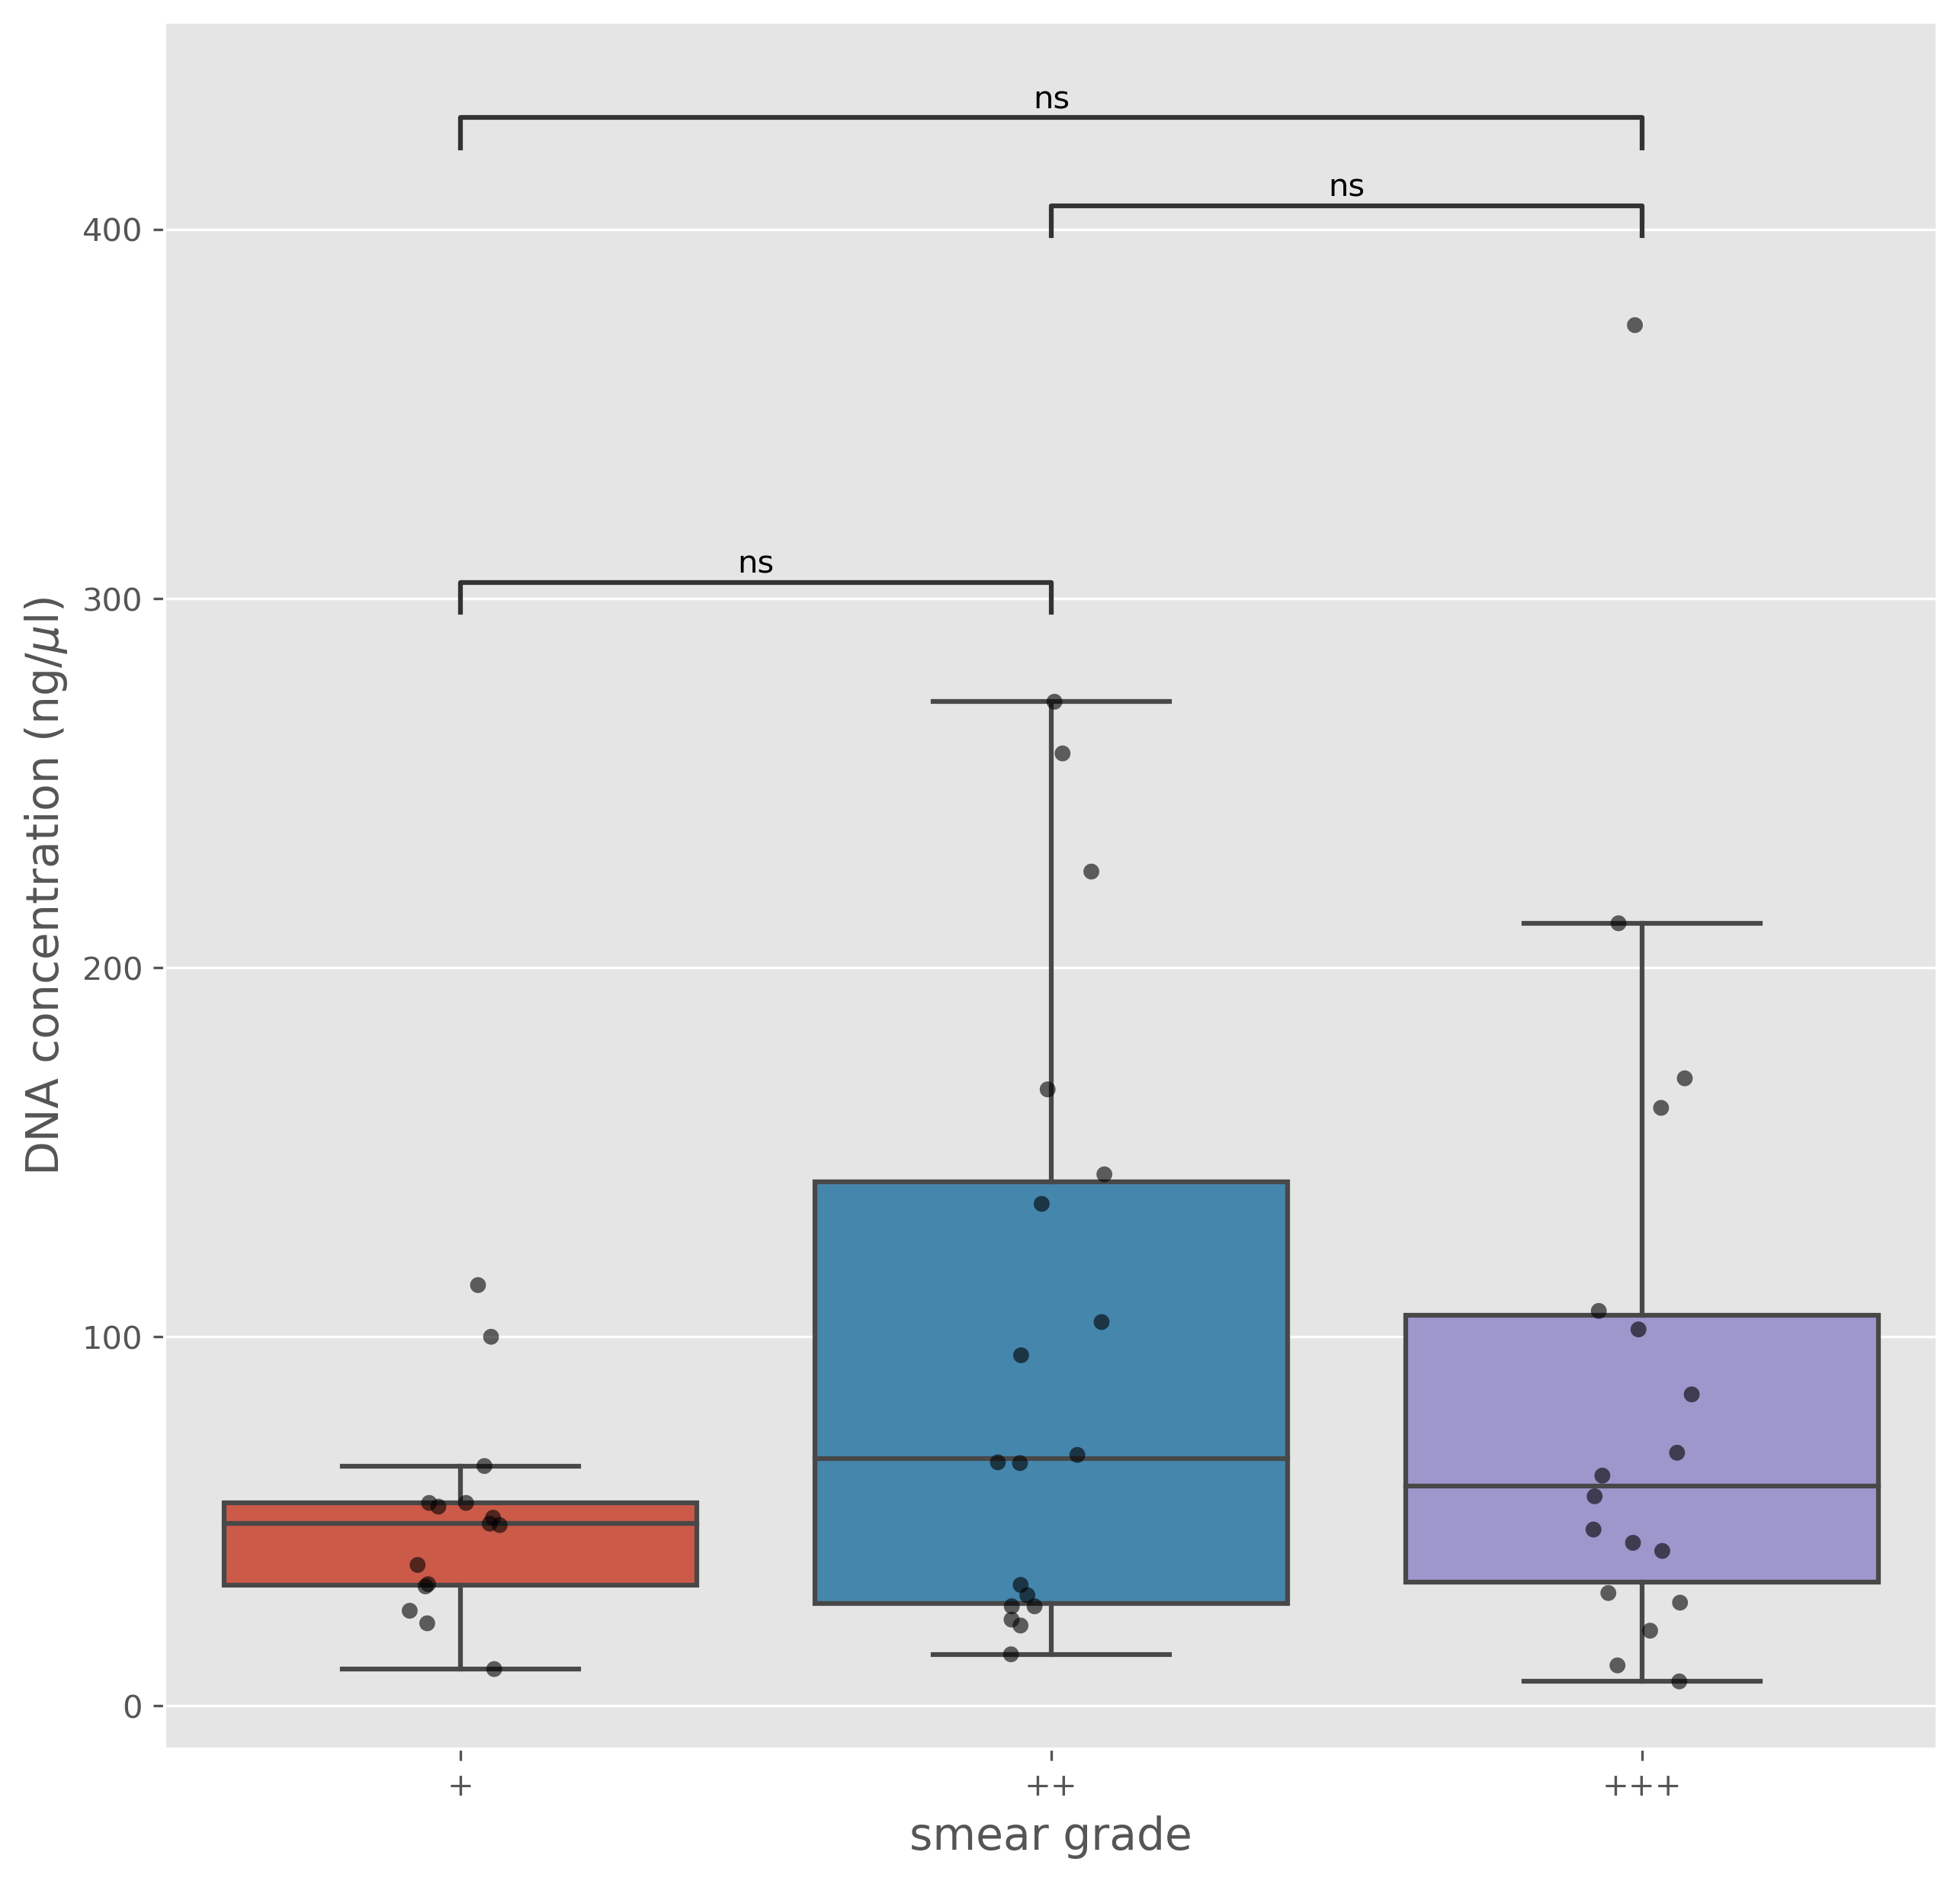

In [164]:
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
x = "smear"
y = "concentration"
sns.boxplot(data=fig2a_df, x=x, y=y, fliersize=0, ax=ax)
sns.stripplot(data=fig2a_df, x=x, y=y, color="black", ax=ax, alpha=alpha)
ax.set_xlabel("smear grade", fontsize=fs)
ax.set_ylabel("DNA concentration (ng/$\mu$l)", fontsize=fs)
# ax.set_yscale("log")
pairs = [("+", "++"), ("++", "+++"), ("+", "+++")]
annot = Annotator(ax, pairs, data=fig2a_df, x=x, y=y)
annot.configure(test='Mann-Whitney',  pvalue_format=pval_fmt)
annot.apply_test()
annot.annotate()
fig.savefig("fig2a.png")
fig.savefig("fig2a.svg")

In [111]:
fig2a_df.query("smear=='+++'")

,name,lineage,source,technology,smear,is_multiplex,species,coverage,concentration,site,id,c,cat,n
57,P221,1.1.2,sputum,illumina,+++,False,Mycobacterium_tuberculosis,2.200000,11.000000,mad,221_mad,2.200000,7_Illumina_3+,1
62,P222,Unknown,sputum,illumina,+++,False,Unknown,0.200000,102.000000,mad,222_mad,0.200000,7_Illumina_3+,3
65,P223,Unknown,sputum,illumina,+++,False,Mycobacterium_tuberculosis,1.100000,30.600000,mad,223_mad,1.100000,7_Illumina_3+,2
68,P224,4.1.2.1,sputum,illumina,+++,False,Mycobacterium_tuberculosis,100.000000,6.660000,mad,224_mad,50.000000,7_Illumina_3+,2
71,P225,4.10,sputum,illumina,+++,False,Mycobacterium_tuberculosis,2.800000,44.200001,mad,225_mad,2.800000,7_Illumina_3+,2
76,P227,Unknown,sputum,illumina,+++,False,Mycobacterium_tuberculosis,0.300000,107.000000,mad,227_mad,0.300000,7_Illumina_3+,1
80,P228,Unknown,sputum,illumina,+++,False,Unknown,0.200000,170.000000,mad,228_mad,0.200000,7_Illumina_3+,2
82,P229,1.1.2,sputum,illumina,+++,False,Mycobacterium_tuberculosis,27.799999,28.000000,mad,229_mad,27.799999,7_Illumina_3+,1
86,P230,3.1.1,sputum,illumina,+++,False,Mycobacterium_tuberculosis,8.000000,62.400002,mad,230_mad,8.000000,7_Illumina_3+,2
92,Test_16,Unknown,sputum,illumina,+++,False,Mycobacterium_tuberculosis,4.800000,47.799999,mum,16_mum,4.800000,7_Illumina_3+,1


# Figure 2b

In [5]:
fig2b_df = pd.read_csv("fig2b.csv").query("name in @final_samples and source != 'culture'")
fig2b_df

,name,lineage,source,technology,smear,is_multiplex,species,coverage,concentration,site,id,c,n,cat,yhat,seyhat,lb,ub
0,P201,Unknown,sputum,nanopore,+,True,Mycobacterium_tuberculosis,0.200000,55.000000,mad,201_mad,0.200000,1,nano_multi,8.451378,2.018242,4.452491,12.450265
1,P201,Unknown,sputum,illumina,+,False,Mycobacterium_tuberculosis,0.800000,55.000000,mad,201_mad,0.800000,2,ill_spu,8.451378,2.018242,4.452491,12.450265
2,P202,Unknown,sputum,illumina,+,False,Unknown,0.200000,49.400002,mad,202_mad,0.200000,1,ill_spu,8.510235,2.073828,4.401210,12.619260
3,P202,1.1.2,sputum,nanopore,+,True,Mycobacterium_tuberculosis,6.000000,49.400002,mad,202_mad,6.000000,2,nano_multi,8.510235,2.073828,4.401210,12.619260
4,P203,4.1.2,sputum,nanopore,+,False,Mycobacterium_tuberculosis,6.600000,114.000000,mad,203_mad,6.600000,1,nano_mono,7.831274,1.979233,3.909677,11.752872
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Test_48,3,sputum,illumina,++,False,Mycobacterium_tuberculosis,1.000000,66.000000,mum,48_mum,1.000000,2,ill_spu,8.335765,1.932314,4.507132,12.164397
109,Test_51,2.2.3,sputum,illumina,+++,False,Mycobacterium_tuberculosis,3.900000,84.400002,mum,51_mum,3.900000,1,ill_spu,8.142377,1.866553,4.444042,11.840712
110,Test_51,2.2.3,sputum,nanopore,+++,False,Mycobacterium_tuberculosis,48.700001,84.400002,mum,51_mum,48.700001,2,nano_mono,8.142377,1.866553,4.444042,11.840712
111,Test_56,Unknown,sputum,illumina,+++,False,Mycobacterium_tuberculosis,2.400000,162.000000,mum,56_mum,2.400000,1,ill_spu,7.326783,2.609548,2.156298,12.497268


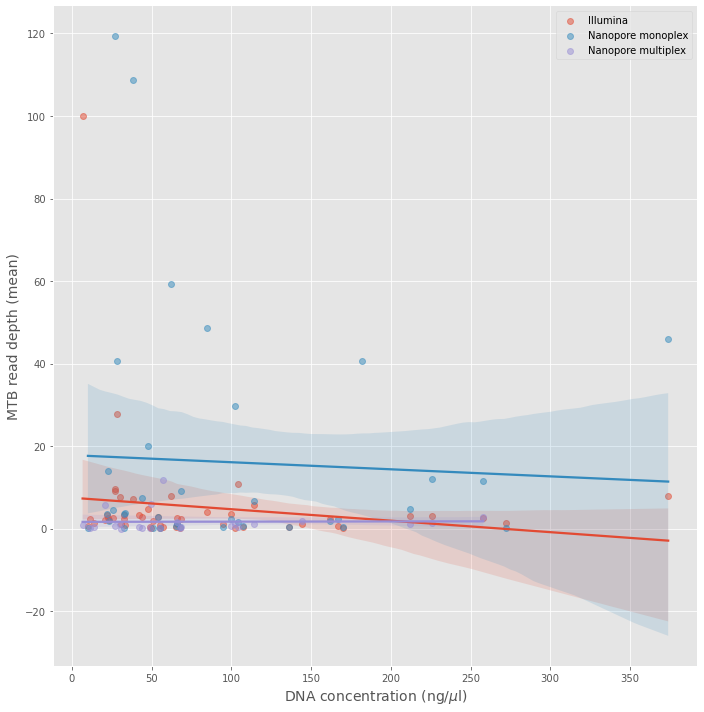

In [21]:
# fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
y = "coverage"
x = "concentration"
hue = "cat"
hue_order = ["ill_spu", "nano_mono", "nano_multi"]
fs = 14
g = sns.lmplot(data=fig2b_df, x=x, y=y, hue=hue, hue_order=hue_order, height=10, scatter_kws=dict(alpha=0.5))
fig = g.fig
ax = g.ax
ax.set_ylabel("MTB read depth (mean)", fontsize=fs)
ax.set_xlabel("DNA concentration (ng/$\mu$l)", fontsize=fs)
# fig.set_dpi(300)
# fig.set_figheight(10)
# fig.set_figwidth(10)
handles, labels = ax.get_legend_handles_labels()
new_labels = []
for l in labels:
    if l.endswith("multi"):
        lab = "Nanopore multiplex"
    elif l.endswith("mono"):
        lab = "Nanopore monoplex"
    else:
        lab = "Illumina"
    new_labels.append(lab)
g.legend.remove()
ax.legend(handles, new_labels)
g.tight_layout()
fig.savefig("fig2b.png", dpi=300)
fig.savefig("fig2b.svg", dpi=300)

# Figure 2c

In [129]:
fig2c_df = pd.read_csv("fig2c.csv").query("name in @final_samples and source != 'culture'")
fig2c_df

,name,lineage,source,technology,smear,is_multiplex,species,coverage,concentration,site,id,cat,c
0,P201,Unknown,sputum,nanopore,+,True,Mycobacterium_tuberculosis,0.2,55.000000,mad,201_mad,Nanopore multiplex 1+,0.2
1,P202,1.1.2,sputum,nanopore,+,True,Mycobacterium_tuberculosis,6.0,49.400002,mad,202_mad,Nanopore multiplex 1+,6.0
2,P203,Unknown,sputum,nanopore,+,True,Mycobacterium_tuberculosis,1.1,114.000000,mad,203_mad,Nanopore multiplex 1+,1.1
3,P203,4.1.2,sputum,nanopore,+,False,Mycobacterium_tuberculosis,6.6,114.000000,mad,203_mad,Nanopore monoplex 1+,6.6
4,P204,Unknown,sputum,nanopore,+,True,Unknown,0.1,49.000000,mad,204_mad,Nanopore multiplex 1+,0.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Test_46,Unknown,sputum,illumina,++,False,Mycobacterium_tuberculosis,3.2,21.799999,mum,46_mum,1_Illumina_2+,3.2
153,Test_47,4.3.4.1,sputum,illumina,+++,False,Mycobacterium_tuberculosis,2.0,20.400000,mum,47_mum,1_Illumina_3+,2.0
154,Test_48,3,sputum,illumina,++,False,Mycobacterium_tuberculosis,1.0,66.000000,mum,48_mum,1_Illumina_2+,1.0
155,Test_51,2.2.3,sputum,illumina,+++,False,Mycobacterium_tuberculosis,3.9,84.400002,mum,51_mum,1_Illumina_3+,3.9


In [130]:
cat = []
for _, row in fig2c_df.iterrows():
    if row["technology"] == "illumina":
        cat.append("Illumina")
    else:
        plex = "multiplex" if row["is_multiplex"] else "monoplex"
        cat.append(f"Nanopore {plex}")
fig2c_df["strategy"] = cat
fig2c_df

,name,lineage,source,technology,smear,is_multiplex,species,coverage,concentration,site,id,cat,c,strategy
0,P201,Unknown,sputum,nanopore,+,True,Mycobacterium_tuberculosis,0.2,55.000000,mad,201_mad,Nanopore multiplex 1+,0.2,Nanopore multiplex
1,P202,1.1.2,sputum,nanopore,+,True,Mycobacterium_tuberculosis,6.0,49.400002,mad,202_mad,Nanopore multiplex 1+,6.0,Nanopore multiplex
2,P203,Unknown,sputum,nanopore,+,True,Mycobacterium_tuberculosis,1.1,114.000000,mad,203_mad,Nanopore multiplex 1+,1.1,Nanopore multiplex
3,P203,4.1.2,sputum,nanopore,+,False,Mycobacterium_tuberculosis,6.6,114.000000,mad,203_mad,Nanopore monoplex 1+,6.6,Nanopore monoplex
4,P204,Unknown,sputum,nanopore,+,True,Unknown,0.1,49.000000,mad,204_mad,Nanopore multiplex 1+,0.1,Nanopore multiplex
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Test_46,Unknown,sputum,illumina,++,False,Mycobacterium_tuberculosis,3.2,21.799999,mum,46_mum,1_Illumina_2+,3.2,Illumina
153,Test_47,4.3.4.1,sputum,illumina,+++,False,Mycobacterium_tuberculosis,2.0,20.400000,mum,47_mum,1_Illumina_3+,2.0,Illumina
154,Test_48,3,sputum,illumina,++,False,Mycobacterium_tuberculosis,1.0,66.000000,mum,48_mum,1_Illumina_2+,1.0,Illumina
155,Test_51,2.2.3,sputum,illumina,+++,False,Mycobacterium_tuberculosis,3.9,84.400002,mum,51_mum,1_Illumina_3+,3.9,Illumina


In [154]:
s="""++_Nanopore monoplex vs. ++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:1.410e-01 U_stat=8.100e+01
+++_Illumina vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:2.486e-02 U_stat=6.050e+01
+++_Nanopore monoplex vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.911e-03 U_stat=1.120e+02
+_Illumina vs. +_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:7.506e-01 U_stat=8.300e+01
+_Nanopore monoplex vs. +_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:5.240e-01 U_stat=3.650e+01
++_Illumina vs. ++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:8.885e-01 U_stat=1.130e+02
+_Nanopore multiplex vs. ++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:1.005e-01 U_stat=2.250e+01
++_Nanopore multiplex vs. +++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:3.944e-02 U_stat=4.050e+01
+++_Illumina vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:6.827e-02 U_stat=1.285e+02
++_Illumina vs. ++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:6.383e-02 U_stat=1.175e+02
+_Illumina vs. +_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:4.061e-01 U_stat=4.750e+01
+_Nanopore monoplex vs. ++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:7.830e-01 U_stat=1.010e+02
+_Nanopore multiplex vs. ++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:1.826e-01 U_stat=1.850e+01
++_Nanopore monoplex vs. +++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:7.637e-01 U_stat=1.090e+02
++_Nanopore multiplex vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.274e-03 U_stat=1.400e+01
+_Nanopore multiplex vs. ++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:6.885e-01 U_stat=1.900e+01
+_Illumina vs. ++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:2.187e-01 U_stat=1.005e+02
+_Nanopore monoplex vs. ++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:8.488e-01 U_stat=7.400e+01
++_Illumina vs. +++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:6.806e-01 U_stat=1.485e+02
++_Nanopore monoplex vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.768e-02 U_stat=4.350e+01
++_Nanopore multiplex vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:5.392e-01 U_stat=5.300e+01
+_Illumina vs. ++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:5.036e-01 U_stat=8.250e+01
+_Nanopore monoplex vs. ++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.356e-01 U_stat=6.800e+01
++_Illumina vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:9.777e-03 U_stat=5.200e+01
++_Nanopore monoplex vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:9.347e-02 U_stat=9.250e+01
+_Nanopore multiplex vs. +++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:1.169e-01 U_stat=2.350e+01
+_Illumina vs. ++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.394e-01 U_stat=8.400e+01
++_Illumina vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:6.132e-02 U_stat=1.295e+02
+_Nanopore monoplex vs. +++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:5.962e-01 U_stat=9.500e+01
+_Nanopore multiplex vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:1.563e-02 U_stat=7.500e+00
+_Illumina vs. +++_Illumina: Mann-Whitney-Wilcoxon test two-sided, P_val:2.324e-01 U_stat=1.015e+02
+_Nanopore monoplex vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:2.557e-02 U_stat=3.650e+01
+_Nanopore multiplex vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:1.000e+00 U_stat=2.550e+01
+_Illumina vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:2.943e-03 U_stat=3.250e+01
+_Nanopore monoplex vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.363e-01 U_stat=7.500e+01
+_Illumina vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.450e-01 U_stat=9.250e+01"""

In [155]:
def convert_cat(s):
    smear, strat = s.strip().split("_")
    return (smear.strip(), strat.strip())

In [160]:
pairs = []
for r in s.splitlines():
    fields = r.split()
    p = float(fields[-2].split(":")[-1])
    if p <= 0.05:
        left = convert_cat(r.split(":")[0].split("vs.")[0])
        right = convert_cat(r.split(":")[0].split("vs.")[1])
        if left[0] == right[0] or left[1] == right[1]:
            pairs.append((left, right))

p-value annotation legend:
      ns: p <= 1.00e+00
$p\leq0.05$: 1.00e-02 < p <= 5.00e-02
$p\leq0.01$: 1.00e-03 < p <= 1.00e-02
$p\leq0.001$: 1.00e-04 < p <= 1.00e-03
$p\leq0.0001$: p <= 1.00e-04

+++_Illumina vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:2.486e-02 U_stat=6.050e+01
+++_Nanopore monoplex vs. +++_Nanopore multiplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.911e-03 U_stat=1.120e+02
++_Nanopore monoplex vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:3.768e-02 U_stat=4.350e+01
+_Nanopore monoplex vs. +++_Nanopore monoplex: Mann-Whitney-Wilcoxon test two-sided, P_val:2.557e-02 U_stat=3.650e+01


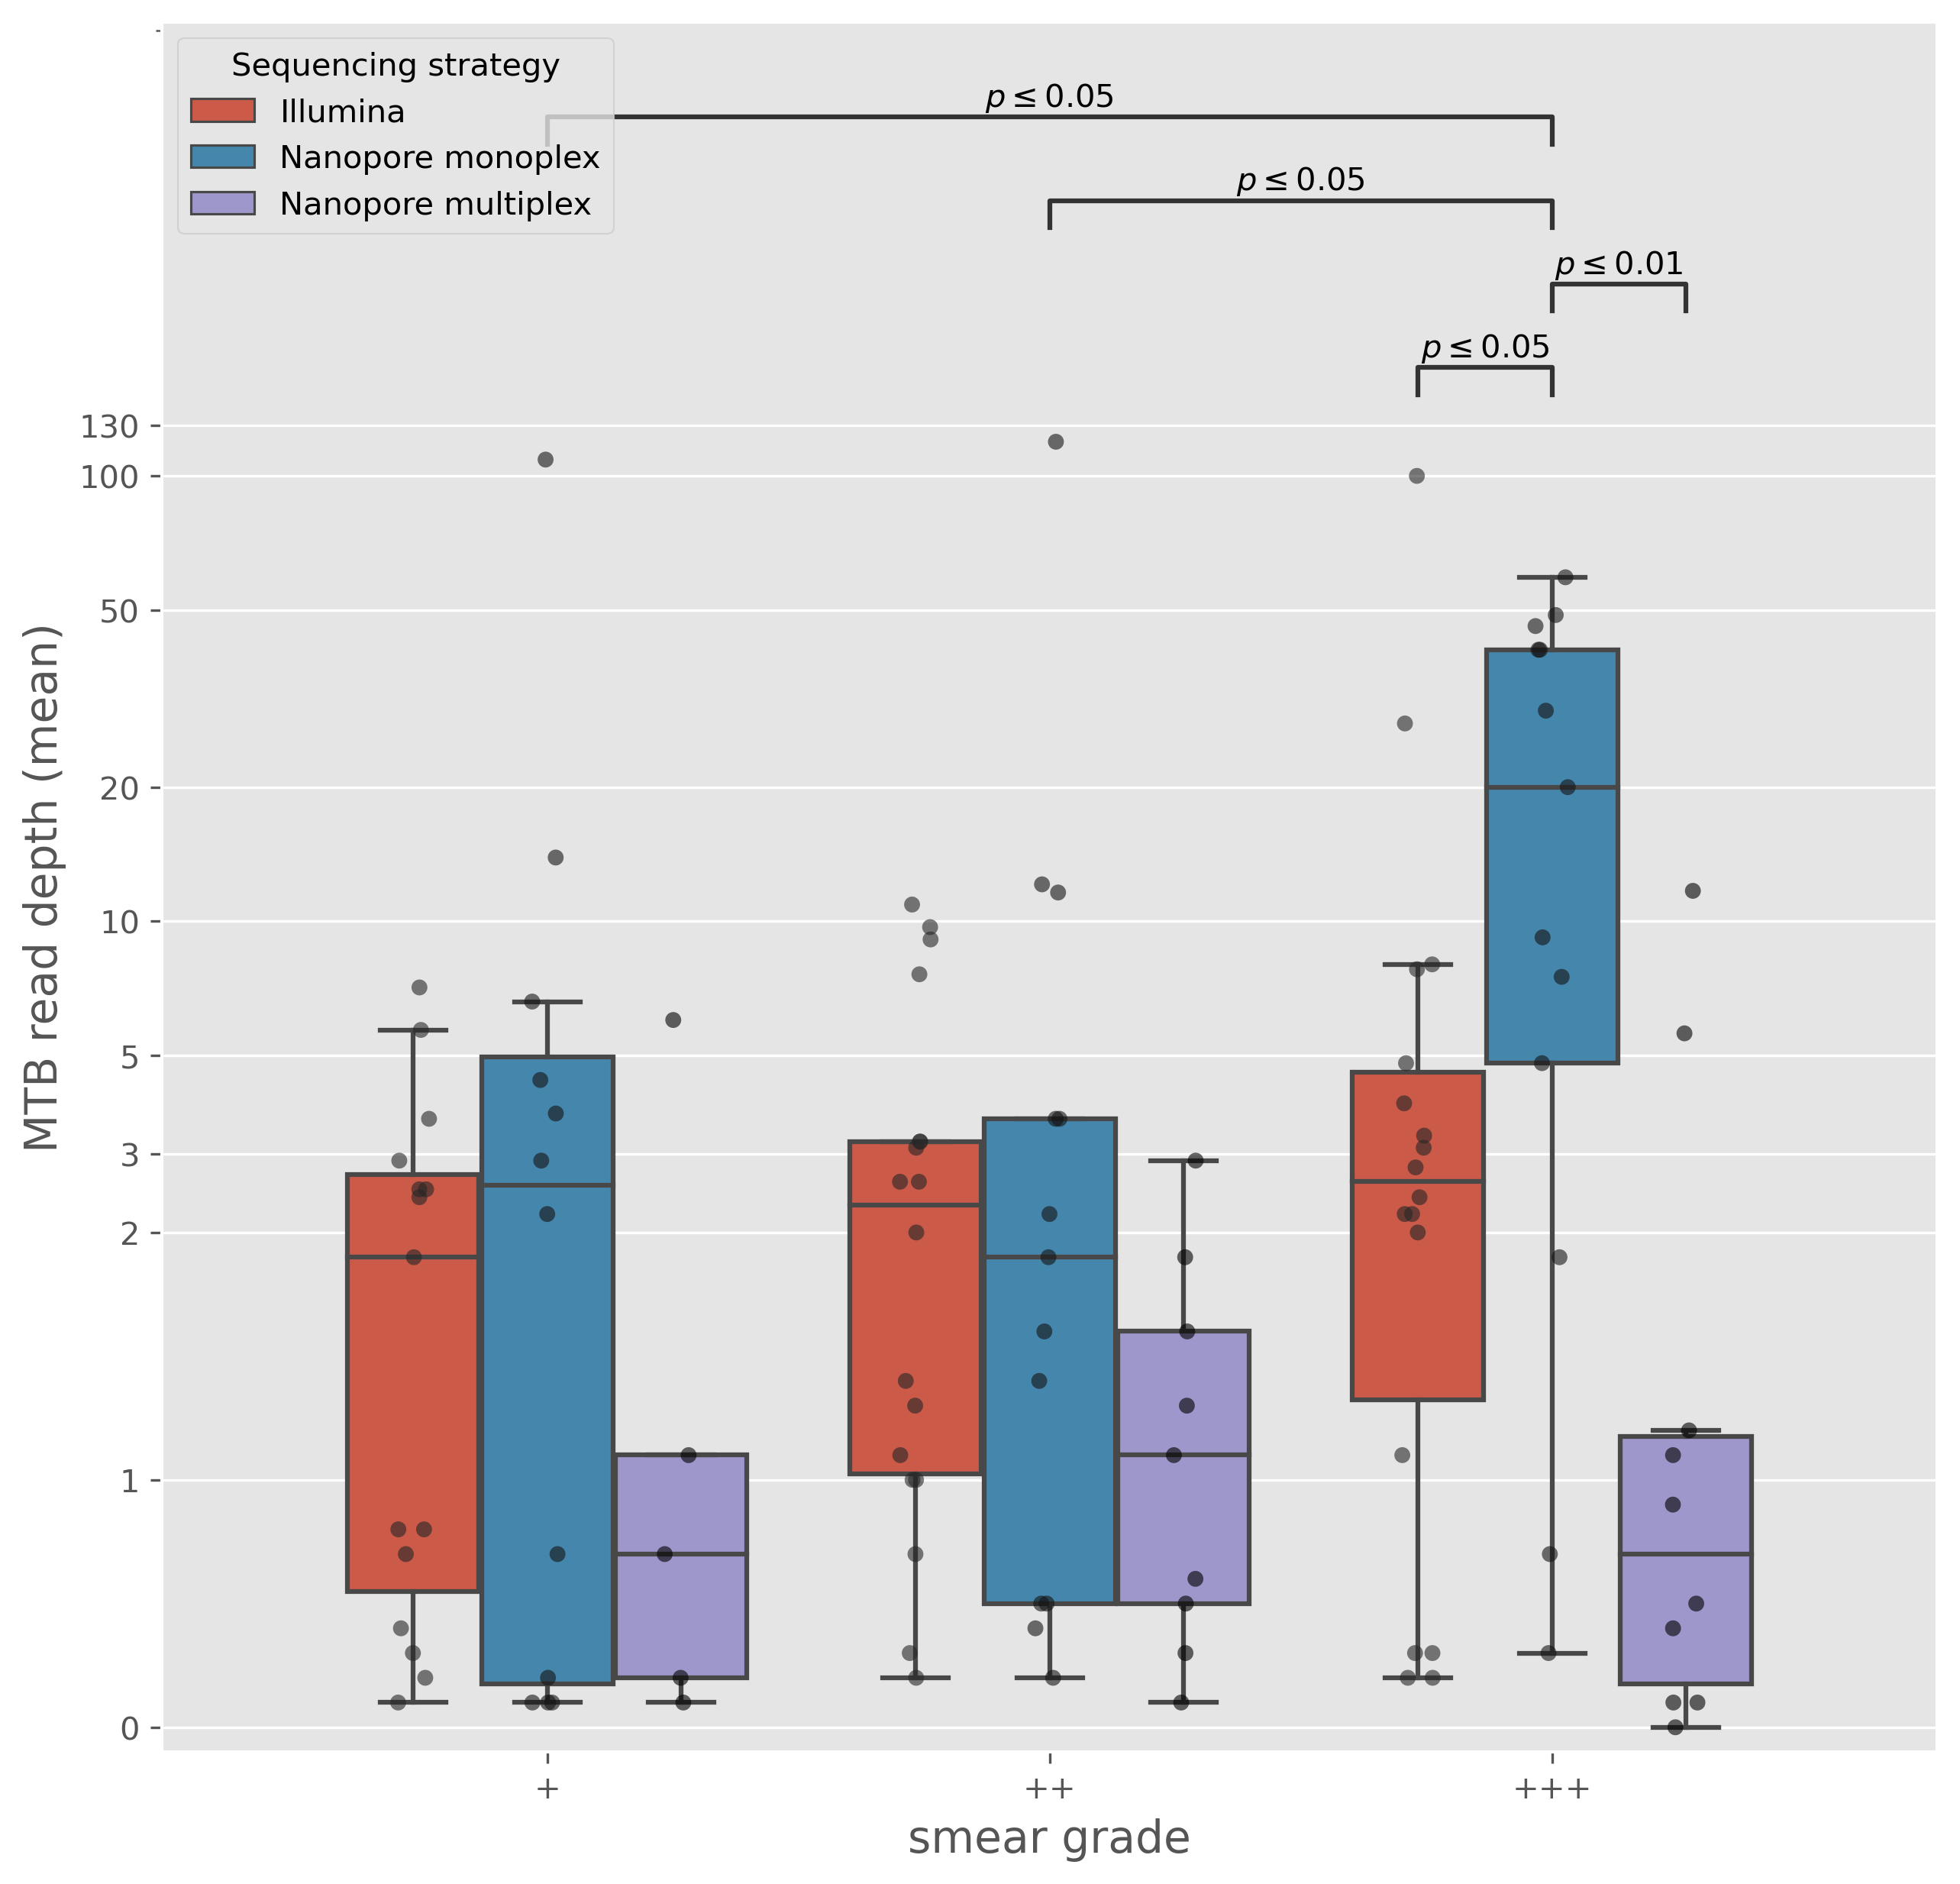

In [162]:
from itertools import product, combinations
fig, ax = plt.subplots(figsize=(10, 10), dpi=300)
x = "smear"
y = "coverage"
hue = "strategy"
hue_order = ["Illumina", "Nanopore monoplex", "Nanopore multiplex"]

sns.boxplot(data=fig2c_df, x=x, y=y, hue=hue, hue_order=hue_order, fliersize=0, ax=ax)
sns.stripplot(data=fig2c_df, x=x, y=y, color="black", ax=ax, alpha=alpha, dodge=True, hue=hue, hue_order=hue_order)
ax.set_xlabel("smear grade", fontsize=fs)
ax.set_ylabel("MTB read depth (mean)", fontsize=fs)
ax.set_yscale("symlog")
ax.set_yticks(yticks)
ax.set_yticklabels(yticks)
ax.set_ylim((-0.1, 150))
legend_without_duplicate_labels(ax, "Sequencing strategy")

annot = Annotator(ax, pairs, data=fig2c_df, x=x, y=y, hue=hue, hue_order=hue_order)
annot.configure(test='Mann-Whitney',  pvalue_format=pval_fmt)
annot.apply_test()
_ = annot.annotate()

fig.savefig("fig2c.png")
fig.savefig("fig2c.svg")